In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../input/customer/customer .csv' , sep = ',' , encoding = 'utf-8')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# missing data

<AxesSubplot:>

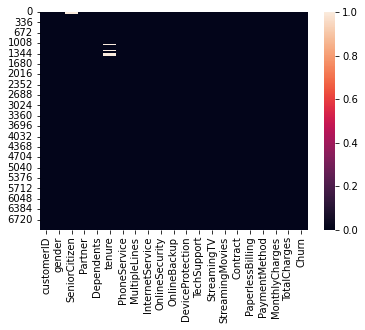

In [5]:
#show the date equal null
sns.heatmap(data.isnull())

the fig show is the data contain null datain two coluom (seniorcitizen , tenure)


In [6]:
#remind data
data.SeniorCitizen.fillna(0.0 , inplace= True)
data.tenure.fillna(data.tenure.mean(), inplace= True)

<AxesSubplot:>

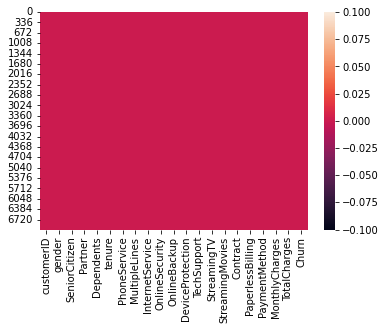

In [7]:
#show the date after remin 
sns.heatmap(data.isnull())

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,33.041473,64.761692,2283.300440
std,0.368612,24.126431,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,31.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# what is the ratio between males and females in our company?

In [9]:
# Plotting the precentage of gender in the data.
import plotly.express as px
fig = px.pie(values=data['gender'].value_counts(), names=data['gender'].value_counts().index, title='gender')
fig.show()

is found the male and female may be equal                              
male (50.5%)       female(49.5%)

# what is the ratio between Senior Citizens and others in our company?


In [10]:
data["SeniorCitizen"].describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: SeniorCitizen, Length: 7043, dtype: float64>

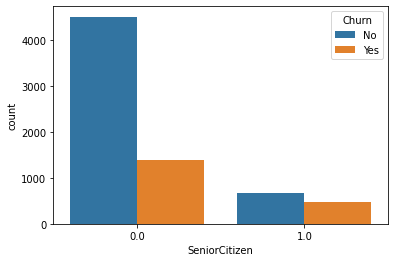

In [11]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.show()

is the relation show is SeniorCitizen(0.0)is more than SeniorCitizen(1.0)

# what is the ratio between who has partners and not in our company?


In [12]:
import plotly.express as px
fig = px.pie(values=data['Partner'].value_counts(), names=data['Partner'].value_counts().index, title='Partner')
fig.show()

is the relation show is Partner(NO,51.7)is more than Partner(Yes,48.3)

# what is the ratio between who has dependents and not in our company?


In [13]:
import plotly.express as px
fig = px.pie(values=data['Dependents'].value_counts(), names=data['Dependents'].value_counts().index, title='Dependents')
fig.show()

is the relation show is Dependents(NO,70)is more than Dependents(Yes,30)

# what is the ratio between who has MultipleLines and not in our company?


In [14]:
import plotly.express as px
fig = px.pie(values=data['MultipleLines'].value_counts(), names=data['MultipleLines'].value_counts().index, title='MultipleLines')
fig.show()

is the relation show is MultipleLines(NO,48.1%)is more than MultipleLines(Yes,42.2%)the (no phpne service,8.68%)

# Depending on the correlation matrix, which variables have a strong relationship with each other?


In [15]:
import plotly.express as px
fig = px.bar(data, x="Contract" , y="tenure")
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



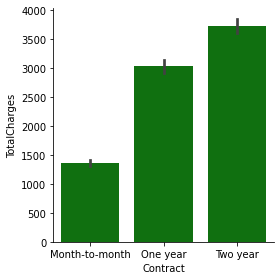

In [16]:
g = sns.FacetGrid(data, height=4, aspect=1)
g.map(sns.barplot, "Contract" ,"TotalCharges",color="green")


Contract (two year) is more in TotalCharges

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



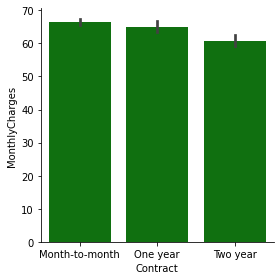

In [17]:
g = sns.FacetGrid(data, height=4, aspect=1)
g.map(sns.barplot, "Contract" ,"MonthlyCharges",color="green")


Contract is (month to month) is more in MonthlyCharges

# From the previous question,What is the relationship between the Internet Services and the churn rate?


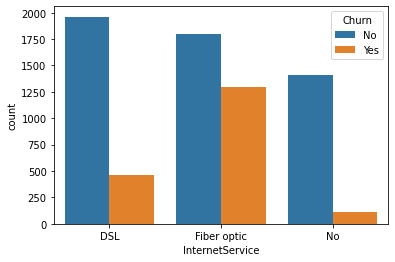

In [18]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.show()

show is max Churn in the (fiber optic InternetService)

# how many Internet Services we provide in our company? - list names and ratio please -


In [19]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [20]:
import plotly.express as px
fig = px.pie(values=data['InternetService'].value_counts(), names=data['InternetService'].value_counts().index, title='InternetService')
fig.show()

 the InternetService is ( fiber optic , DSL , NO )                           
 the retio is max fiber optic the DSL 

# what is our Contract types we provide? - names and ratio please-


In [21]:
data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

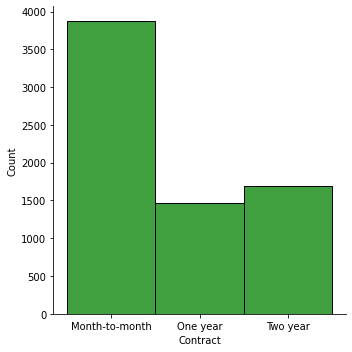

In [22]:

sns.displot(data=data , x='Contract',color="green")

the contract is (month to month , one year , tow year )
the max contract month to month then two year

# how many customers uses StreamingTV ?- what is the ratio between users who streaming movies to StreamingTV subscribers?


In [23]:
data["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [24]:
data["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:ylabel='customerID'>

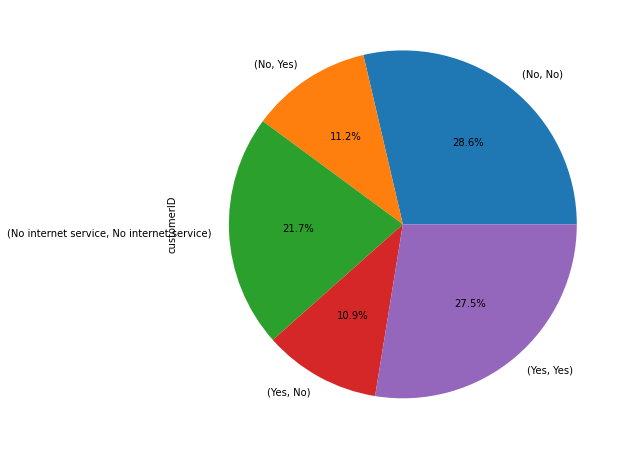

In [25]:
plt.figure(figsize=(12,8))
round(data.groupby(['StreamingTV', 'StreamingMovies']).count()['customerID']/data.shape[0]*100,2).plot.pie(autopct='%1.1f%%')

number of customer useing StreamingTV (2707)          
the fig show relation between StreamingTV and StreamingMovies is the max is (no ,no )



# Is there a strong relationship between the monthly recharge rate and the dependents?


In [26]:
data["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

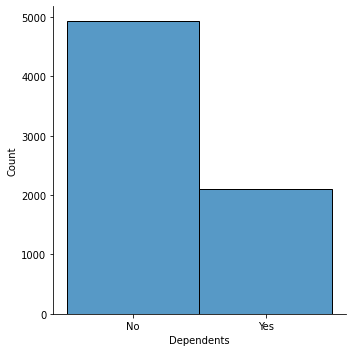

In [27]:
sns.displot(data=data , x='Dependents')

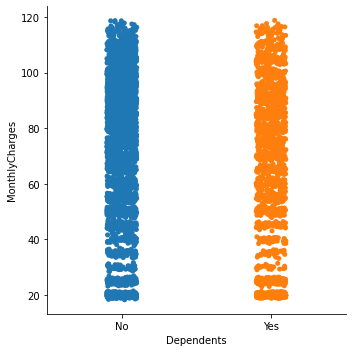

In [28]:
g = sns.catplot(x="Dependents", y="MonthlyCharges", data=data)

no Dependents is more in MonthlyCharges

# who is the the most important customer in the company according to Monthly and Total charges?


Text(0.5, 1.0, 'MonthlyCharges vs TotalCharges')

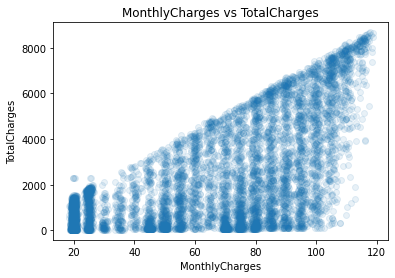

In [29]:
plt.scatter(data['MonthlyCharges'], data['TotalCharges'] , alpha = 0.1)
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.title("MonthlyCharges vs TotalCharges")

In [30]:
 data['max_TotalCharges']=data['TotalCharges'].max()

In [31]:
 data['max_MonthlyCharges']=data['MonthlyCharges'].max()

In [32]:
fig = px.scatter_3d(data, x='max_MonthlyCharges', y='max_TotalCharges', z='customerID')
fig.show()

the best customerid (6671-NGWON)

# how many payment methods we provide? and what is the ratio between each others?


In [33]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

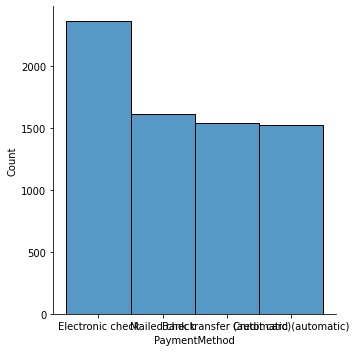

In [34]:
sns.displot(data=data , x='PaymentMethod')

<AxesSubplot:ylabel='PaymentMethod'>

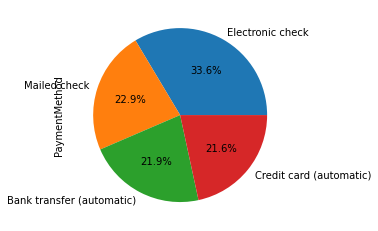

In [35]:
round(data['PaymentMethod'].value_counts()/data.shape[0]*100,2).plot.pie(autopct='%1.1f%%')

the type PaymentMethod is (Electronic check , Mailed check , Bank transfer , Credit card )

# what is our churn rate?


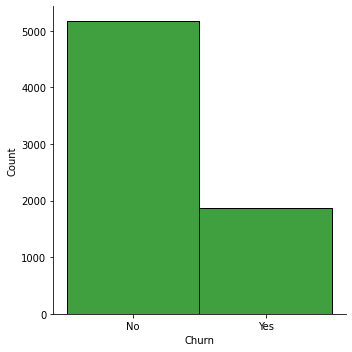

In [36]:
sns.displot(data=data , x='Churn',color="green")

the churn is (no) is the more

# what is the average monthly charge?


In [37]:
data["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

the average monthly charge is => 64.761692

# From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?


In [38]:
data["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [39]:
data["SeniorCitizen"].value_counts()

0.0    5901
1.0    1142
Name: SeniorCitizen, dtype: int64

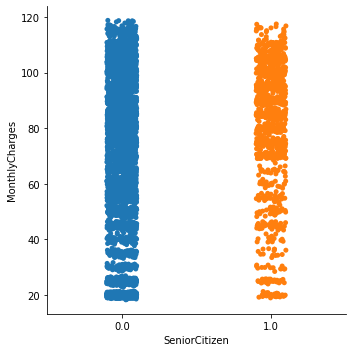

In [40]:
g = sns.catplot(x="SeniorCitizen", y="MonthlyCharges", data=data)

the SeniorCitizen is (0.0) is more in MonthlyCharges 

# We want to give offers according to the monthly charge categories, can you explain that? Using Visulization


In [41]:
data["MonthlyCharges"]

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

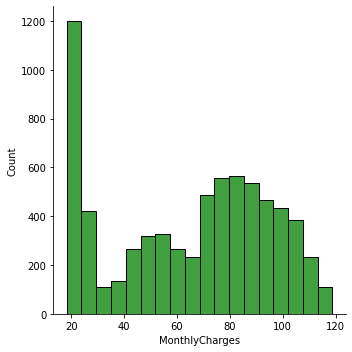

In [42]:
sns.displot(data=data , x='MonthlyCharges',color="green")

In [43]:
def offer_MonthlyCharges(row):
    if row['MonthlyCharges'] > 0 and row["MonthlyCharges"]<= 40 :
        return row['MonthlyCharges']*1.5
    elif row['MonthlyCharges'] > 40 and row["MonthlyCharges"]<= 60 :
        return row['MonthlyCharges']*1.5
    elif row['MonthlyCharges'] > 60 and row["MonthlyCharges"]<= 80:
        return row['MonthlyCharges']*2.5
    elif row['MonthlyCharges'] > 80 and row["MonthlyCharges"]<= 100:
        return row['MonthlyCharges']*2.5
    elif row['MonthlyCharges'] > 100 and row["MonthlyCharges"]<= 120:
        return row['MonthlyCharges']*3

In [44]:
data['offer_MonthlyCharges'] = data.apply(offer_MonthlyCharges , axis = 1)

In [45]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,max_TotalCharges,max_MonthlyCharges,offer_MonthlyCharges
0,7590-VHVEG,Female,0.0,Yes,No,33.041473,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,8684.8,118.75,44.775
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,8684.8,118.75,85.425
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,8684.8,118.75,80.775
3,7795-CFOCW,Male,0.0,No,No,45.000000,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,8684.8,118.75,63.450
4,9237-HQITU,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,8684.8,118.75,176.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.000000,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,8684.8,118.75,212.000
7039,2234-XADUH,Female,0.0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,8684.8,118.75,309.600
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.000000,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,8684.8,118.75,44.400
7041,8361-LTMKD,Male,1.0,Yes,No,4.000000,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,8684.8,118.75,186.000


In [46]:
data["offer_MonthlyCharges"]

0        44.775
1        85.425
2        80.775
3        63.450
4       176.750
         ...   
7038    212.000
7039    309.600
7040     44.400
7041    186.000
7042    316.950
Name: offer_MonthlyCharges, Length: 7043, dtype: float64

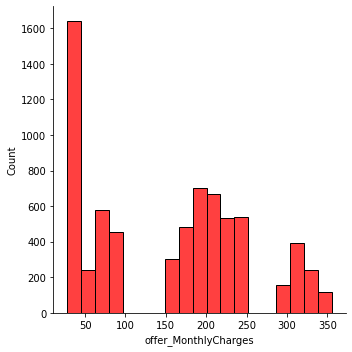

In [47]:
sns.displot(data=data , x='offer_MonthlyCharges',color="red")

is fig show the data after offer

# We want to present offers by gender and the Senior Citizen, could you explain that? Using Visulization

In [48]:
def offer_gender(row):
    if row['gender'] == "Male" and row["SeniorCitizen"]==1 :
        return "Male_senior"
    elif row['gender'] == "Male" and row["SeniorCitizen"]==0 :
        return "Male_junior"
    elif row['gender'] == "Female" and row["SeniorCitizen"]==1 :
        return "Female_senior"
    elif row['gender'] == "Female" and row["SeniorCitizen"]==0:
        return "Female_junior"
    else :
        return "Other"

In [49]:
data['offer_gender'] = data.apply(offer_gender , axis = 1)

In [50]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,max_TotalCharges,max_MonthlyCharges,offer_MonthlyCharges,offer_gender
0,7590-VHVEG,Female,0.0,Yes,No,33.041473,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,8684.8,118.75,44.775,Female_junior
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,8684.8,118.75,85.425,Male_junior
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,8684.8,118.75,80.775,Male_junior
3,7795-CFOCW,Male,0.0,No,No,45.000000,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,8684.8,118.75,63.450,Male_junior
4,9237-HQITU,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,8684.8,118.75,176.750,Female_junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.000000,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.50,No,8684.8,118.75,212.000,Male_junior
7039,2234-XADUH,Female,0.0,Yes,Yes,72.000000,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,8684.8,118.75,309.600,Female_junior
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.000000,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,8684.8,118.75,44.400,Female_junior
7041,8361-LTMKD,Male,1.0,Yes,No,4.000000,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,8684.8,118.75,186.000,Male_senior


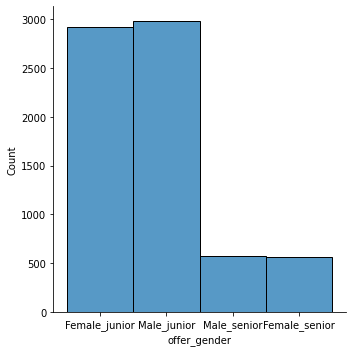

In [51]:
sns.displot(data=data , x='offer_gender')

<AxesSubplot:ylabel='offer_gender'>

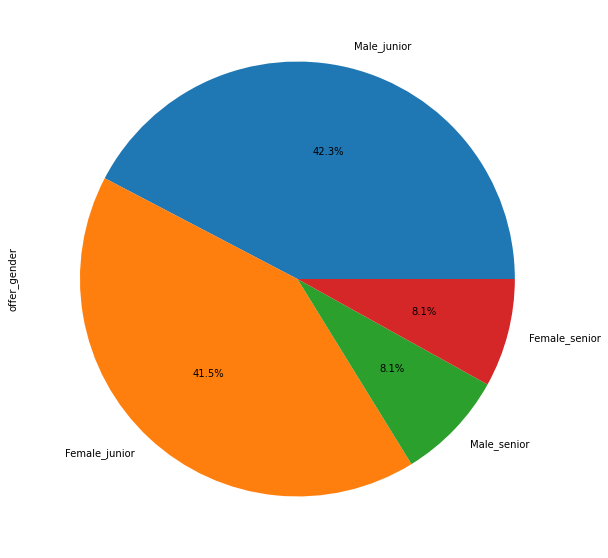

In [52]:
round(data['offer_gender'].value_counts()/data.shape[0]*100,2).plot.pie(autopct='%1.1f%%',figsize=(10, 10))

 the fig show is the most is male_junior (42.3%)